####  user 1 on 22/06/17

In [1]:
import pandas as pd

# Load the dataset
labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt", 
                        delim_whitespace=True, header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Extract the Start Time and End Time columns
first_column = labels_df['Start Time']
second_column = labels_df['End Time']

# Convert columns to NumPy arrays
first_column_array = first_column.to_numpy()
second_column_array = second_column.to_numpy()

# Define the conversion function
def convert_milliseconds(ms_array):
    converted_times = []
    for ms in ms_array:
        seconds = (ms // 1000) % 60
        minutes = (ms // (1000 * 60)) % 60
        hours = (ms // (1000 * 60 * 60)) % 24
        days = ms // (1000 * 60 * 60 * 24)
        converted_times.append(f"{days} days, {hours} hours, {minutes} minutes, {seconds} seconds")
    return converted_times

# Convert the Start Time and End Time columns
converted_times_array_start = convert_milliseconds(first_column_array)
converted_times_array_end = convert_milliseconds(second_column_array)

# Overwrite the original Start Time and End Time columns
labels_df['Start Time'] = converted_times_array_start
labels_df['End Time'] = converted_times_array_end

# Print the updated DataFrame
labels_df.head()




C:\Users\athar\AppData\Local\Temp\ipykernel_17824\642874775.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt",


,Start Time,End Time,Activity
0,"17339 days, 8 hours, 46 minutes, 49 seconds","17339 days, 8 hours, 52 minutes, 19 seconds",4
1,"17339 days, 8 hours, 52 minutes, 34 seconds","17339 days, 8 hours, 56 minutes, 4 seconds",0
2,"17339 days, 8 hours, 56 minutes, 49 seconds","17339 days, 9 hours, 8 minutes, 34 seconds",10
3,"17339 days, 9 hours, 8 minutes, 35 seconds","17339 days, 9 hours, 14 minutes, 34 seconds",4
4,"17339 days, 9 hours, 22 minutes, 34 seconds","17339 days, 9 hours, 34 minutes, 19 seconds",8


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_17824\2128243582.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


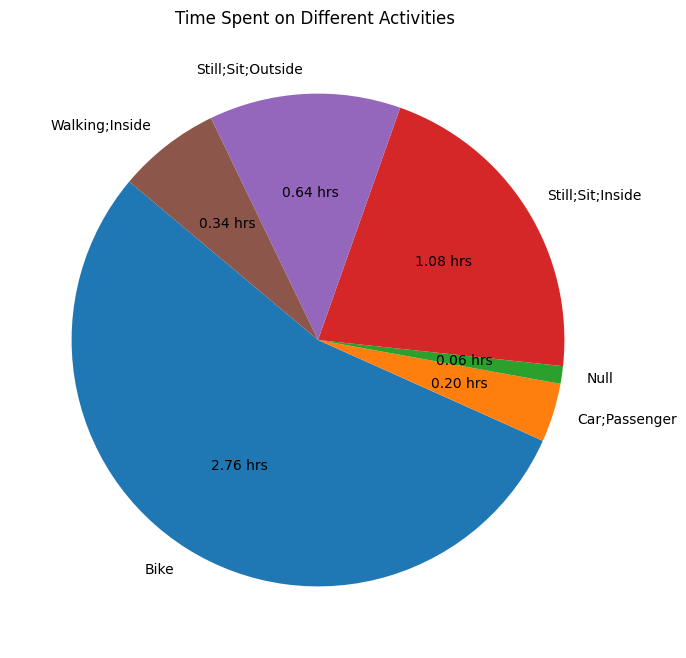

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt", 
                        sep='\s+', header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate the duration for each activity in milliseconds
labels_df['Duration (ms)'] = labels_df['End Time'] - labels_df['Start Time']

# Map the activities to meaningful names
activity_mapping = {
    0: 'Null',
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)

# Aggregate the total time spent on each activity
activity_durations = labels_df.groupby('Activity Name')['Duration (ms)'].sum()

# Convert milliseconds to hours for better visualization
activity_durations_hours = activity_durations / (1000 * 60 * 60)

# Calculate the total time by subtracting the first Start Time from the last End Time
total_time_ms = labels_df['End Time'].iloc[-1] - labels_df['Start Time'].iloc[0]
total_time_hours = total_time_ms / (1000 * 60 * 60)

# Function to display exact hours in the pie chart
def absolute_hours(val, durations):
    total = sum(durations)
    hours = val/100 * total
    return f'{hours:.2f} hrs'

# Plot the pie chart with exact hours
plt.figure(figsize=(8, 8))
plt.pie(activity_durations_hours, labels=activity_durations.index, 
        autopct=lambda val: absolute_hours(val, activity_durations_hours), startangle=140)
plt.title(f'Time Spent on Different Activities ')
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_17824\3105579538.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


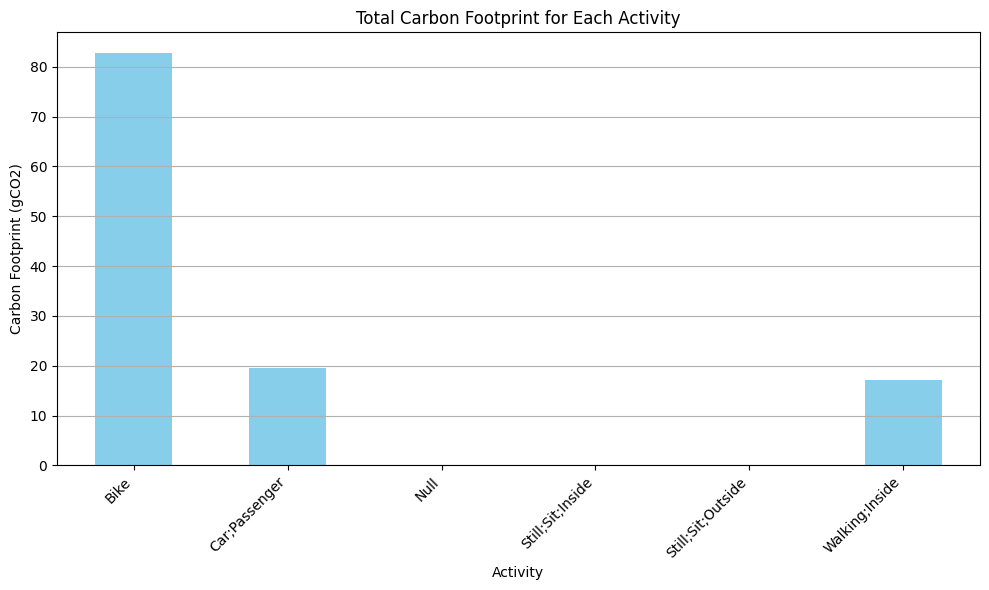

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt", 
                        sep='\s+', header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate the duration for each activity in milliseconds
labels_df['Duration (ms)'] = labels_df['End Time'] - labels_df['Start Time']

# Map the activities to meaningful names
activity_mapping = {
    0: 'Null',
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)

# Carbon footprint values in gCO2/h
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25
}

# Calculate carbon footprint for each activity based on duration
def calculate_carbon_footprint(row):
    activity = row['Activity Name']
    duration_hours = row['Duration (ms)'] / (1000 * 60 * 60)  # Convert milliseconds to hours
    carbon_per_hour = carbon_footprint_mapping.get(activity, 0)
    return carbon_per_hour * duration_hours

labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(calculate_carbon_footprint, axis=1)

# Aggregate the total carbon footprint for each activity
carbon_footprint_totals = labels_df.groupby('Activity Name')['Carbon Footprint (gCO2)'].sum()

# Plot the carbon footprint for each activity
plt.figure(figsize=(10, 6))
carbon_footprint_totals.plot(kind='bar', color='skyblue')
plt.title('Total Carbon Footprint for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Carbon Footprint (gCO2)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###  Read location (GPS) data

In [4]:
hips_location_df = pd.read_csv(r'dataset\220617\Hips_Location.txt', delim_whitespace=True, header=None)
hips_location_df.columns = ['Time', 'Ignore1', 'Ignore2', 'Accuracy', 'Latitude', 'Longitude', 'Altitude']

hips_location_df.drop(columns=['Ignore1','Ignore2'], inplace=True)


h_time = hips_location_df['Time']
h_time_converted = convert_milliseconds(h_time)
hips_location_df['Time'] = h_time_converted


hips_location_df.head()

#df.drop(columns=['B'], inplace=True)


C:\Users\athar\AppData\Local\Temp\ipykernel_17824\3163997318.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hips_location_df = pd.read_csv(r'dataset\220617\Hips_Location.txt', delim_whitespace=True, header=None)


,Time,Accuracy,Latitude,Longitude,Altitude
0,"17339 days, 8 hours, 40 minutes, 10 seconds",350.0,50.846145,-0.137434,-354.525315
1,"17339 days, 8 hours, 40 minutes, 11 seconds",350.0,50.847710,-0.130524,369.113523
2,"17339 days, 8 hours, 40 minutes, 12 seconds",350.0,50.846167,-0.137324,-345.342402
3,"17339 days, 8 hours, 40 minutes, 13 seconds",200.0,50.846212,-0.137121,11.013710
4,"17339 days, 8 hours, 40 minutes, 14 seconds",200.0,50.846233,-0.137009,-57.376872


In [5]:
bag_location_df = pd.read_csv(r'dataset\220617\Bag_Location.txt', delim_whitespace=True, header=None)
bag_location_df.columns = ['Time', 'Ignore1', 'Ignore2', 'Accuracy', 'Latitude', 'Longitude', 'Altitude']

bag_location_df.drop(columns=['Ignore1','Ignore2'], inplace=True)

b_time = bag_location_df['Time']
b_time_converted = convert_milliseconds(b_time)
bag_location_df['Time'] = b_time_converted


bag_location_df.head()


C:\Users\athar\AppData\Local\Temp\ipykernel_17824\3858438743.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bag_location_df = pd.read_csv(r'dataset\220617\Bag_Location.txt', delim_whitespace=True, header=None)


,Time,Accuracy,Latitude,Longitude,Altitude
0,"17339 days, 8 hours, 45 minutes, 56 seconds",300.0,50.846555,-0.133766,24.017604
1,"17339 days, 8 hours, 45 minutes, 57 seconds",300.0,50.846755,-0.134974,114.915230
2,"17339 days, 8 hours, 45 minutes, 58 seconds",300.0,50.846557,-0.133779,114.915230
3,"17339 days, 8 hours, 45 minutes, 59 seconds",300.0,50.846557,-0.133779,114.915230
4,"17339 days, 8 hours, 46 minutes, 0 seconds",300.0,50.846557,-0.133779,114.915230


In [6]:
hand_location_df = pd.read_csv(r'dataset\220617\Hand_Location.txt', delim_whitespace=True, header=None)
hand_location_df.columns = ['Time', 'Ignore1', 'Ignore2', 'Accuracy', 'Latitude', 'Longitude', 'Altitude']
hand_location_df.drop(columns=['Ignore1','Ignore2'], inplace=True)


hd_time = hand_location_df['Time']
hd_time_converted = convert_milliseconds(hd_time)
hand_location_df['Time'] = hd_time_converted
hand_location_df.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17824\1877754569.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hand_location_df = pd.read_csv(r'dataset\220617\Hand_Location.txt', delim_whitespace=True, header=None)


,Time,Accuracy,Latitude,Longitude,Altitude
0,"17339 days, 8 hours, 40 minutes, 5 seconds",250.0,50.846735,-0.132870,127.109440
1,"17339 days, 8 hours, 40 minutes, 6 seconds",250.0,50.846631,-0.133384,87.109988
2,"17339 days, 8 hours, 40 minutes, 7 seconds",350.0,50.846726,-0.132895,-131.346677
3,"17339 days, 8 hours, 40 minutes, 8 seconds",250.0,50.846717,-0.132928,-58.585848
4,"17339 days, 8 hours, 40 minutes, 9 seconds",250.0,50.846706,-0.132980,179.487496


In [7]:
torso_location_df = pd.read_csv(r'dataset\220617\Torso_Location.txt', delim_whitespace=True, header=None)
torso_location_df.columns = ['Time', 'Ignore1', 'Ignore2', 'Accuracy', 'Latitude', 'Longitude', 'Altitude']
torso_location_df.drop(columns=['Ignore1','Ignore2'], inplace=True)


t_time = torso_location_df['Time']
t_time_converted = convert_milliseconds(t_time)
torso_location_df['Time'] = t_time_converted


torso_location_df.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17824\3798462470.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  torso_location_df = pd.read_csv(r'dataset\220617\Torso_Location.txt', delim_whitespace=True, header=None)


,Time,Accuracy,Latitude,Longitude,Altitude
0,"17339 days, 8 hours, 46 minutes, 39 seconds",250.0,50.846991,-0.133410,197.359720
1,"17339 days, 8 hours, 46 minutes, 40 seconds",48.0,50.846820,-0.133310,109.531521
2,"17339 days, 8 hours, 46 minutes, 41 seconds",48.0,50.846988,-0.133408,109.531521
3,"17339 days, 8 hours, 46 minutes, 42 seconds",48.0,50.846986,-0.133405,116.693999
4,"17339 days, 8 hours, 46 minutes, 43 seconds",48.0,50.846986,-0.133405,116.693999


#### Motion file (Sensor Data)

In [8]:
import pandas as pd
hips_motion_df = pd.read_csv(r'dataset\220617\Hips_Motion.txt', delim_whitespace=True, header=None)
hips_motion_df.columns = [
    'Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 
    'Mag_X', 'Mag_Y', 'Mag_Z', 'Orientation_w', 'Orientation_x', 'Orientation_y', 'Orientation_z',
    'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Linear_Acc_X', 'Linear_Acc_Y', 'Linear_Acc_Z', 
    'Pressure', 'Altitude', 'Temperature'
]



print(hips_motion_df.head())




C:\Users\athar\AppData\Local\Temp\ipykernel_17824\1001775061.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hips_motion_df = pd.read_csv(r'dataset\220617\Hips_Motion.txt', delim_whitespace=True, header=None)


           Time  Acc_X  Acc_Y  Acc_Z  Gyro_X  Gyro_Y  Gyro_Z  Mag_X  Mag_Y  \
0  1.498120e+12    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
1  1.498120e+12    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
2  1.498120e+12    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
3  1.498120e+12    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   
4  1.498120e+12    NaN    NaN    NaN     NaN     NaN     NaN    NaN    NaN   

   Mag_Z  ...  Orientation_z  Gravity_X  Gravity_Y  Gravity_Z  Linear_Acc_X  \
0    NaN  ...            NaN        NaN        NaN        NaN           NaN   
1    NaN  ...            NaN        NaN        NaN        NaN           NaN   
2    NaN  ...            NaN        NaN        NaN        NaN           NaN   
3    NaN  ...            NaN        NaN        NaN        NaN           NaN   
4    NaN  ...            NaN        NaN        NaN        NaN           NaN   

   Linear_Acc_Y  Linear_Acc_Z  Pressure  Altitude  Tempe

In [9]:
hand_motion_df = pd.read_csv(r'dataset\220617\Hand_Motion.txt', delim_whitespace=True, header=None)
hand_motion_df.columns = [
    'Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 
    'Mag_X', 'Mag_Y', 'Mag_Z', 'Orientation_w', 'Orientation_x', 'Orientation_y', 'Orientation_z',
    'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Linear_Acc_X', 'Linear_Acc_Y', 'Linear_Acc_Z', 
    'Pressure', 'Altitude', 'Temperature'
]

hand_motion_df.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17824\1612324788.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hand_motion_df = pd.read_csv(r'dataset\220617\Hand_Motion.txt', delim_whitespace=True, header=None)


,Time,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,...,Orientation_z,Gravity_X,Gravity_Y,Gravity_Z,Linear_Acc_X,Linear_Acc_Y,Linear_Acc_Z,Pressure,Altitude,Temperature
0,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
torso_motion_df = pd.read_csv(r'dataset\220617\Torso_Motion.txt', delim_whitespace=True, header=None)
torso_motion_df.columns = [
    'Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 
    'Mag_X', 'Mag_Y', 'Mag_Z', 'Orientation_w', 'Orientation_x', 'Orientation_y', 'Orientation_z',
    'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Linear_Acc_X', 'Linear_Acc_Y', 'Linear_Acc_Z', 
    'Pressure', 'Altitude', 'Temperature'
]

torso_motion_df.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_17824\3028888202.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  torso_motion_df = pd.read_csv(r'dataset\220617\Torso_Motion.txt', delim_whitespace=True, header=None)


,Time,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,...,Orientation_z,Gravity_X,Gravity_Y,Gravity_Z,Linear_Acc_X,Linear_Acc_Y,Linear_Acc_Z,Pressure,Altitude,Temperature
0,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.498120e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### user1 on 26/06/17


In [11]:
import pandas as pd

# Load the dataset
labels_df = pd.read_csv(r"dataset\260617\labels_track_main.txt", 
                        delim_whitespace=True, header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Extract the Start Time and End Time columns
first_column = labels_df['Start Time']
second_column = labels_df['End Time']

# Convert columns to NumPy arrays
first_column_array = first_column.to_numpy()
second_column_array = second_column.to_numpy()

# Define the conversion function
def convert_milliseconds(ms_array):
    converted_times = []
    for ms in ms_array:
        seconds = (ms // 1000) % 60
        minutes = (ms // (1000 * 60)) % 60
        hours = (ms // (1000 * 60 * 60)) % 24
        days = ms // (1000 * 60 * 60 * 24)
        converted_times.append(f"{days} days, {hours} hours, {minutes} minutes, {seconds} seconds")
    return converted_times

# Convert the Start Time and End Time columns
converted_times_array_start = convert_milliseconds(first_column_array)
converted_times_array_end = convert_milliseconds(second_column_array)

# Overwrite the original Start Time and End Time columns
labels_df['Start Time'] = converted_times_array_start
labels_df['End Time'] = converted_times_array_end

# Print the updated DataFrame
print(labels_df.head())




                                     Start Time  \
0   17343 days, 9 hours, 45 minutes, 39 seconds   
1   17343 days, 9 hours, 51 minutes, 54 seconds   
2   17343 days, 9 hours, 57 minutes, 39 seconds   
3   17343 days, 10 hours, 21 minutes, 9 seconds   
4  17343 days, 10 hours, 26 minutes, 24 seconds   

                                       End Time  Activity  
0   17343 days, 9 hours, 51 minutes, 25 seconds         4  
1   17343 days, 9 hours, 56 minutes, 54 seconds         0  
2   17343 days, 10 hours, 20 minutes, 9 seconds        10  
3   17343 days, 10 hours, 26 minutes, 9 seconds        10  
4  17343 days, 10 hours, 28 minutes, 10 seconds         6  


C:\Users\athar\AppData\Local\Temp\ipykernel_17824\4088515042.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels_df = pd.read_csv(r"dataset\260617\labels_track_main.txt",


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_17824\3755097157.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


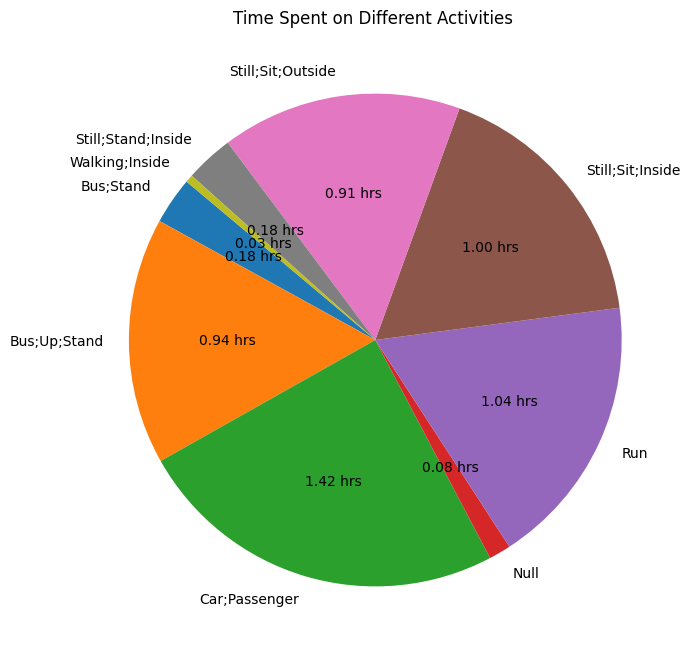

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
labels_df = pd.read_csv(r"dataset\260617\labels_track_main.txt", 
                        sep='\s+', header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate the duration for each activity in milliseconds
labels_df['Duration (ms)'] = labels_df['End Time'] - labels_df['Start Time']

# Map the activities to meaningful names
activity_mapping = {
    0: 'Null',
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)

# Aggregate the total time spent on each activity
activity_durations = labels_df.groupby('Activity Name')['Duration (ms)'].sum()

# Convert milliseconds to hours for better visualization
activity_durations_hours = activity_durations / (1000 * 60 * 60)

# Calculate the total time by subtracting the first Start Time from the last End Time
total_time_ms = labels_df['End Time'].iloc[-1] - labels_df['Start Time'].iloc[0]
total_time_hours = total_time_ms / (1000 * 60 * 60)

# Function to display exact hours in the pie chart
def absolute_hours(val, durations):
    total = sum(durations)
    hours = val/100 * total
    return f'{hours:.2f} hrs'

# Plot the pie chart with exact hours
plt.figure(figsize=(8, 8))
plt.pie(activity_durations_hours, labels=activity_durations.index, 
        autopct=lambda val: absolute_hours(val, activity_durations_hours), startangle=140)
plt.title(f'Time Spent on Different Activities ')
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_17824\2257453631.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


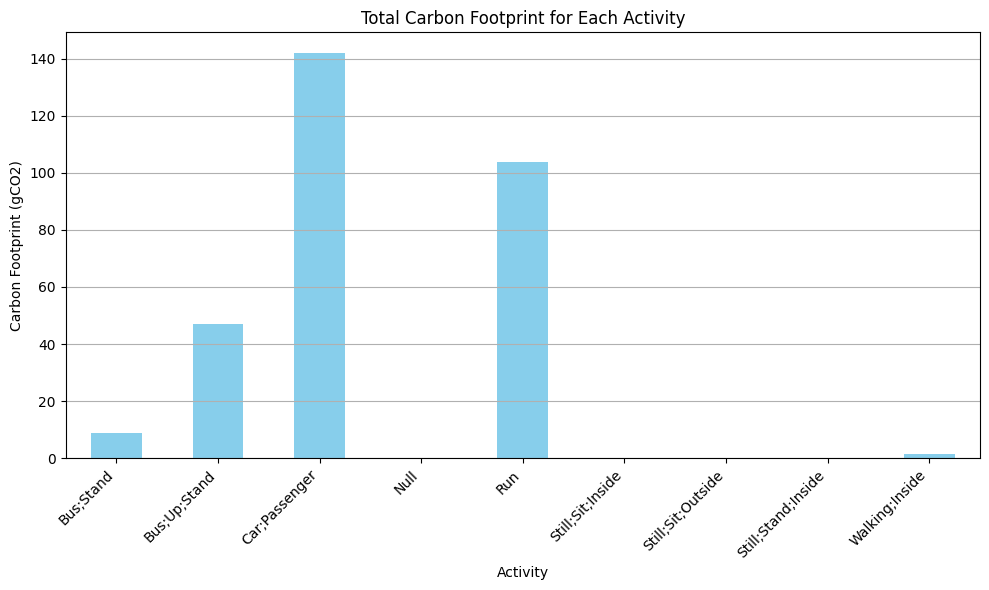

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
labels_df = pd.read_csv(r"dataset\260617\labels_track_main.txt", 
                        sep='\s+', header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate the duration for each activity in milliseconds
labels_df['Duration (ms)'] = labels_df['End Time'] - labels_df['Start Time']

# Map the activities to meaningful names
activity_mapping = {
    0: 'Null',
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)

# Carbon footprint values in gCO2/h
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25
}

# Calculate carbon footprint for each activity based on duration
def calculate_carbon_footprint(row):
    activity = row['Activity Name']
    duration_hours = row['Duration (ms)'] / (1000 * 60 * 60)  # Convert milliseconds to hours
    carbon_per_hour = carbon_footprint_mapping.get(activity, 0)
    return carbon_per_hour * duration_hours

labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(calculate_carbon_footprint, axis=1)

# Aggregate the total carbon footprint for each activity
carbon_footprint_totals = labels_df.groupby('Activity Name')['Carbon Footprint (gCO2)'].sum()

# Plot the carbon footprint for each activity
plt.figure(figsize=(10, 6))
carbon_footprint_totals.plot(kind='bar', color='skyblue')
plt.title('Total Carbon Footprint for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Carbon Footprint (gCO2)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load the dataset
labels_df = pd.read_csv(r"dataset\270617\labels_track_main.txt", 
                        delim_whitespace=True, header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Extract the Start Time and End Time columns
first_column = labels_df['Start Time']
second_column = labels_df['End Time']

# Convert columns to NumPy arrays
first_column_array = first_column.to_numpy()
second_column_array = second_column.to_numpy()

# Define the conversion function
def convert_milliseconds(ms_array):
    converted_times = []
    for ms in ms_array:
        seconds = (ms // 1000) % 60
        minutes = (ms // (1000 * 60)) % 60
        hours = (ms // (1000 * 60 * 60)) % 24
        days = ms // (1000 * 60 * 60 * 24)
        converted_times.append(f"{days} days, {hours} hours, {minutes} minutes, {seconds} seconds")
    return converted_times

# Convert the Start Time and End Time columns
converted_times_array_start = convert_milliseconds(first_column_array)
converted_times_array_end = convert_milliseconds(second_column_array)

# Overwrite the original Start Time and End Time columns
labels_df['Start Time'] = converted_times_array_start
labels_df['End Time'] = converted_times_array_end

# Print the updated DataFrame
labels_df.head()




C:\Users\athar\AppData\Local\Temp\ipykernel_17824\131973487.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels_df = pd.read_csv(r"dataset\270617\labels_track_main.txt",


,Start Time,End Time,Activity
0,"17344 days, 9 hours, 15 minutes, 43 seconds","17344 days, 9 hours, 24 minutes, 58 seconds",7
1,"17344 days, 9 hours, 32 minutes, 14 seconds","17344 days, 10 hours, 34 minutes, 44 seconds",15
2,"17344 days, 10 hours, 45 minutes, 29 seconds","17344 days, 10 hours, 49 minutes, 13 seconds",5
3,"17344 days, 10 hours, 49 minutes, 28 seconds","17344 days, 11 hours, 15 minutes, 13 seconds",16
4,"17344 days, 11 hours, 15 minutes, 28 seconds","17344 days, 11 hours, 29 minutes, 28 seconds",17


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_17824\2693524562.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


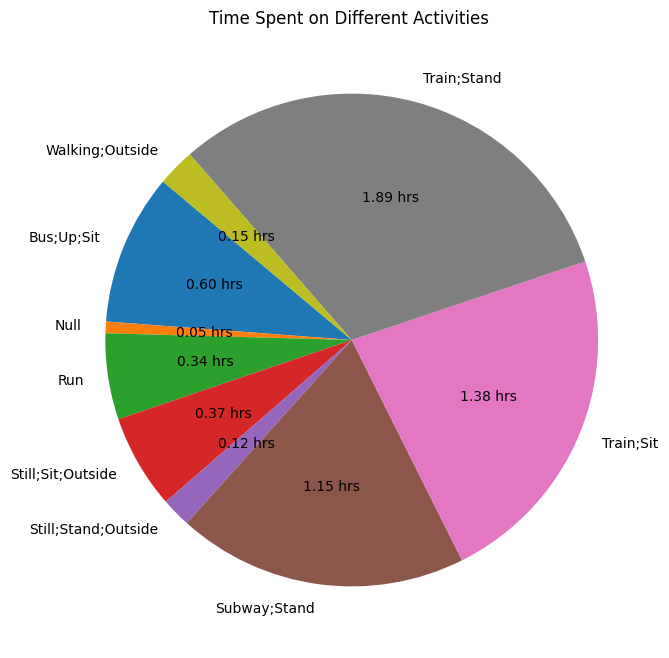

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
labels_df = pd.read_csv(r"dataset\270617\labels_track_main.txt", 
                        sep='\s+', header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate the duration for each activity in milliseconds
labels_df['Duration (ms)'] = labels_df['End Time'] - labels_df['Start Time']

# Map the activities to meaningful names
activity_mapping = {
    0: 'Null',
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)

# Aggregate the total time spent on each activity
activity_durations = labels_df.groupby('Activity Name')['Duration (ms)'].sum()

# Convert milliseconds to hours for better visualization
activity_durations_hours = activity_durations / (1000 * 60 * 60)

# Calculate the total time by subtracting the first Start Time from the last End Time
total_time_ms = labels_df['End Time'].iloc[-1] - labels_df['Start Time'].iloc[0]
total_time_hours = total_time_ms / (1000 * 60 * 60)

# Function to display exact hours in the pie chart
def absolute_hours(val, durations):
    total = sum(durations)
    hours = val/100 * total
    return f'{hours:.2f} hrs'

# Plot the pie chart with exact hours
plt.figure(figsize=(8, 8))
plt.pie(activity_durations_hours, labels=activity_durations.index, 
        autopct=lambda val: absolute_hours(val, activity_durations_hours), startangle=140)
plt.title(f'Time Spent on Different Activities ')
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_17824\1512621407.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


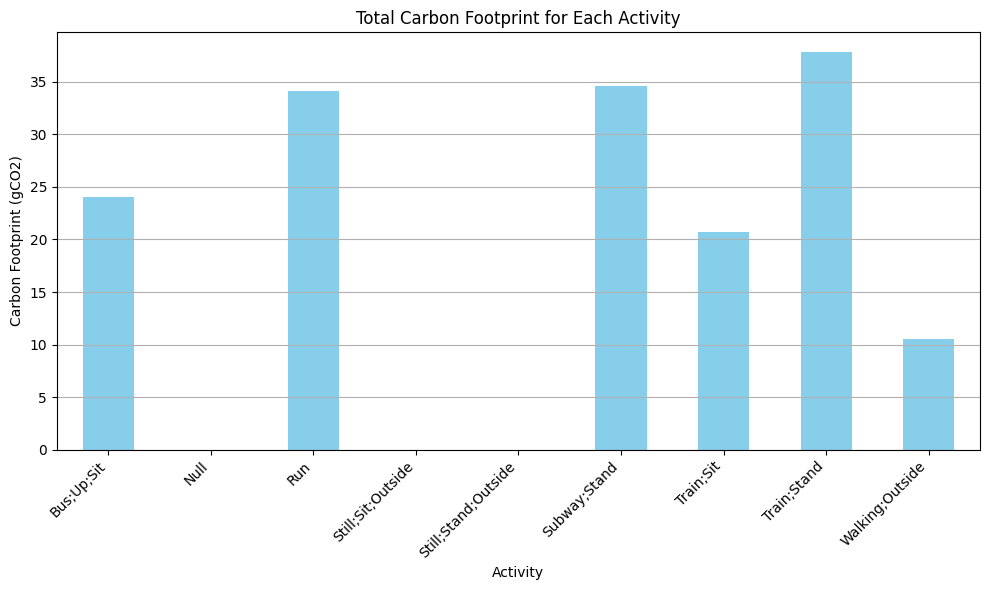

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
labels_df = pd.read_csv(r"dataset\270617\labels_track_main.txt", 
                        sep='\s+', header=None)

# Assign column names
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate the duration for each activity in milliseconds
labels_df['Duration (ms)'] = labels_df['End Time'] - labels_df['Start Time']

# Map the activities to meaningful names
activity_mapping = {
    0: 'Null',
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)

# Carbon footprint values in gCO2/h
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25
}

# Calculate carbon footprint for each activity based on duration
def calculate_carbon_footprint(row):
    activity = row['Activity Name']
    duration_hours = row['Duration (ms)'] / (1000 * 60 * 60)  # Convert milliseconds to hours
    carbon_per_hour = carbon_footprint_mapping.get(activity, 0)
    return carbon_per_hour * duration_hours

labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(calculate_carbon_footprint, axis=1)

# Aggregate the total carbon footprint for each activity
carbon_footprint_totals = labels_df.groupby('Activity Name')['Carbon Footprint (gCO2)'].sum()

# Plot the carbon footprint for each activity
plt.figure(figsize=(10, 6))
carbon_footprint_totals.plot(kind='bar', color='skyblue')
plt.title('Total Carbon Footprint for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Carbon Footprint (gCO2)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### model which can be used to predict the amount of carbon footprint emitted

C:\Users\athar\AppData\Local\Temp\ipykernel_17824\220074737.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  labels_df['Activity Name'].fillna('Unknown', inplace=True)  # Replace NaN values


Mean Absolute Error: 0.48
Mean Squared Error: 0.57
R-squared: 0.60


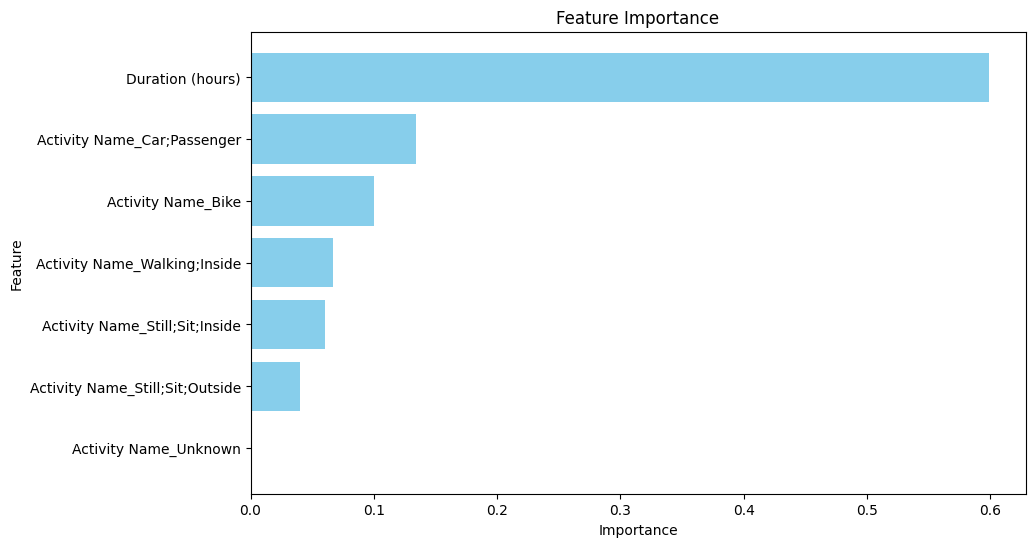

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare the dataset with corrected sep argument
labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt", 
                        sep=r'\s+', header=None)
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate duration in hours
labels_df['Duration (hours)'] = (labels_df['End Time'] - labels_df['Start Time']) / (1000 * 60 * 60)

# Mapping activities to meaningful names
activity_mapping = {
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

# Map activities, handle NaN values by replacing them with 'Unknown' (or drop NaNs if preferred)
labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)
labels_df['Activity Name'].fillna('Unknown', inplace=True)  # Replace NaN values

# Carbon footprint values in gCO2/h for each activity
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25,
    'Unknown': 0  # Assign a default carbon footprint value for unknown activities
}

# Calculate carbon footprint based on duration and activity, safely handling unknown activities
labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(
    lambda row: carbon_footprint_mapping.get(row['Activity Name'], 0) * row['Duration (hours)'], axis=1)

# Select features (X) and target (y)
X = labels_df[['Activity Name', 'Duration (hours)']]  # Feature set
y = labels_df['Carbon Footprint (gCO2)']  # Target variable

# One-hot encode the categorical 'Activity Name'
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['Activity Name']])

# Combine the encoded activity names with the duration
X_final = pd.concat([pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out()), X['Duration (hours)']], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize and train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the carbon footprint on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance
importances = model.feature_importances_
feature_names = X_final.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


C:\Users\athar\AppData\Local\Temp\ipykernel_17824\1806286938.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  labels_df['Activity Name'].fillna('Unknown', inplace=True)


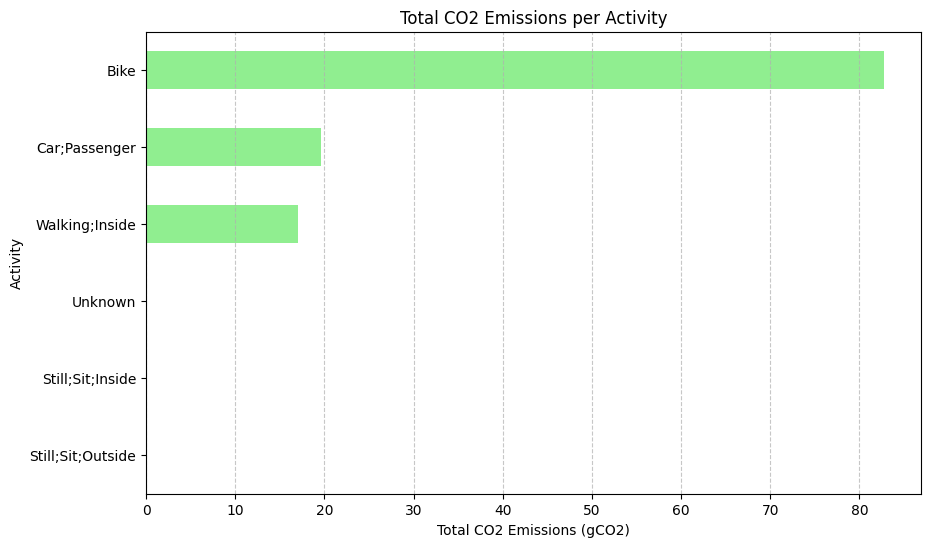

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset with corrected sep argument
labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt", 
                        sep=r'\s+', header=None)
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate duration in hours
labels_df['Duration (hours)'] = (labels_df['End Time'] - labels_df['Start Time']) / (1000 * 60 * 60)

# Mapping activities to meaningful names
activity_mapping = {
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

# Map activities, handle NaN values by replacing them with 'Unknown' (or drop NaNs if preferred)
labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)
labels_df['Activity Name'].fillna('Unknown', inplace=True)  

# Carbon footprint values in gCO2/h for each activity
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25,
    'Unknown': 0  # Assign a default carbon footprint value for unknown activities
}

# Calculate carbon footprint based on duration and activity, safely handling unknown activities
labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(
    lambda row: carbon_footprint_mapping.get(row['Activity Name'], 0) * row['Duration (hours)'], axis=1)

# Aggregate the total CO2 emissions per activity
activity_carbon_footprint = labels_df.groupby('Activity Name')['Carbon Footprint (gCO2)'].sum()

# Plot the total CO2 emissions per activity
plt.figure(figsize=(10, 6))
activity_carbon_footprint.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Total CO2 Emissions per Activity')
plt.xlabel('Total CO2 Emissions (gCO2)')
plt.ylabel('Activity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Mean Absolute Error: 1.36 grams of CO2


C:\Users\athar\AppData\Local\Temp\ipykernel_17824\2480938297.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  labels_df['Activity Name'].fillna('Unknown', inplace=True)


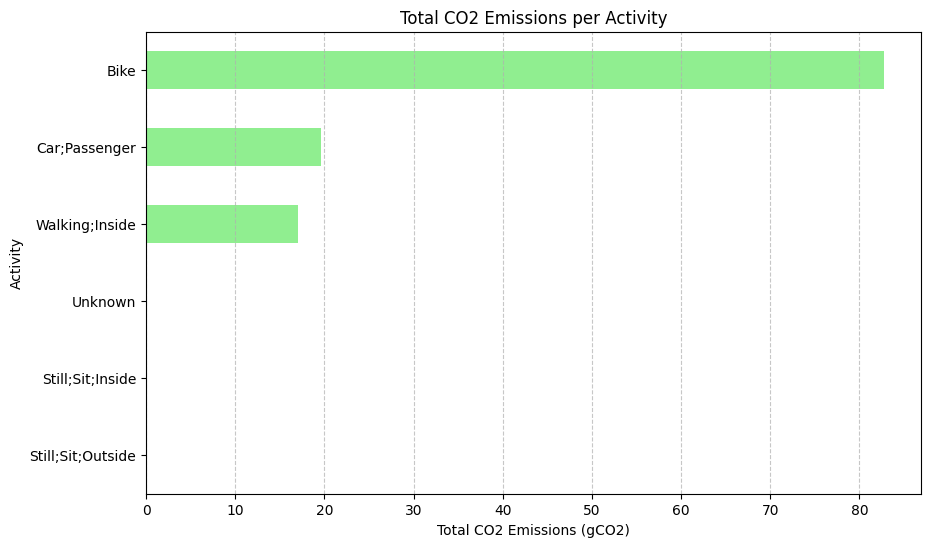

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load and prepare the dataset with corrected sep argument
labels_df = pd.read_csv(r"dataset\220617\labels_track_main.txt", 
                        sep=r'\s+', header=None)
labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate duration in hours
labels_df['Duration (hours)'] = (labels_df['End Time'] - labels_df['Start Time']) / (1000 * 60 * 60)

# Mapping activities to meaningful names
activity_mapping = {
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

# Map activities, handle NaN values by replacing them with 'Unknown' (or drop NaNs if preferred)
labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)
labels_df['Activity Name'].fillna('Unknown', inplace=True)

# Carbon footprint values in gCO2/h for each activity
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25,
    'Unknown': 0  # Default carbon footprint for unknown activities
}

# Calculate carbon footprint based on duration and activity
labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(
    lambda row: carbon_footprint_mapping.get(row['Activity Name'], 0) * row['Duration (hours)'], axis=1)

# Encode categorical variable 'Activity Name' into numerical data
le = LabelEncoder()
labels_df['Activity Code'] = le.fit_transform(labels_df['Activity Name'])

# Features (X) and target (y)
X = labels_df[['Activity Code', 'Duration (hours)']]
y = labels_df['Carbon Footprint (gCO2)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy (R² score) and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model accuracy metrics

print(f'Mean Absolute Error: {mae:.2f} grams of CO2')

# Plot the total CO2 emissions per activity (same as before)
activity_carbon_footprint = labels_df.groupby('Activity Name')['Carbon Footprint (gCO2)'].sum()

plt.figure(figsize=(10, 6))
activity_carbon_footprint.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Total CO2 Emissions per Activity')
plt.xlabel('Total CO2 Emissions (gCO2)')
plt.ylabel('Activity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Data Extraction (Assuming you have already extracted and cleaned the data)
data = pd.DataFrame({
    'mode_of_transport': ['Car', 'Bus', 'Bike'],
    'distance_km': [20, 5, 2],
    'carbon_emission': [4.5, 1.2, 0.1]  # Assuming these are calculated or provided
})

# Step 2: Preprocess Data (One-Hot Encoding for Categorical Data)
data = pd.get_dummies(data, columns=['mode_of_transport'], drop_first=True)

# Step 3: Train-Test Split
X = data.drop('carbon_emission', axis=1)
y = data['carbon_emission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.371600000000003


C:\Users\athar\AppData\Local\Temp\ipykernel_17824\1581998295.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  labels_df['Activity Name'].fillna('Unknown', inplace=True)
c:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


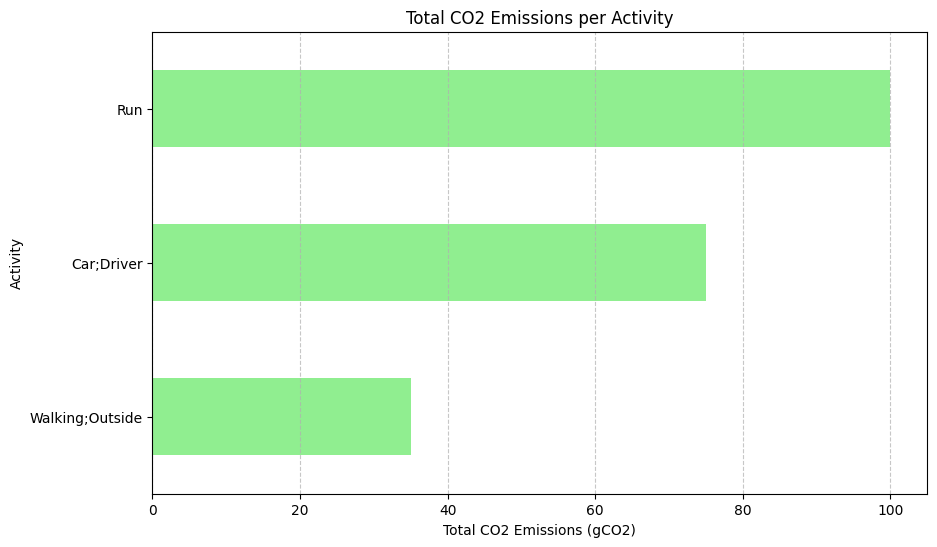

,Activity Name,Carbon Footprint (kgCO2),Footprint Category
0,Walking;Outside,0.035,Good
1,Car;Driver,0.075,Good
2,Run,0.100,Good


In [21]:
# Let's modify the code to add a feature comparing the total carbon footprint emitted with the specified ranges (<2kg is good, 2-4kg is average, >4kg is bad).

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load and prepare the dataset with corrected sep argument
labels_df = pd.DataFrame({
    'Start Time': [1623172800000, 1623176400000, 1623180000000],  # Example times (milliseconds)
    'End Time': [1623174600000, 1623178200000, 1623183600000],    # Example times (milliseconds)
    'Activity': [5, 9, 7]  # Walking Outside, Car Driver, Run
})

labels_df.columns = ['Start Time', 'End Time', 'Activity']

# Calculate duration in hours
labels_df['duration'] = (labels_df['End Time'] - labels_df['Start Time']) / (1000 * 60 * 60)

# Mapping activities to meaningful names
activity_mapping = {
    1: 'Still;Stand;Outside',
    2: 'Still;Stand;Inside',
    3: 'Still;Sit;Outside',
    4: 'Still;Sit;Inside',
    5: 'Walking;Outside',
    6: 'Walking;Inside',
    7: 'Run',
    8: 'Bike',
    9: 'Car;Driver',
    10: 'Car;Passenger',
    11: 'Bus;Stand',
    12: 'Bus;Sit',
    13: 'Bus;Up;Stand',
    14: 'Bus;Up;Sit',
    15: 'Train;Stand',
    16: 'Train;Sit',
    17: 'Subway;Stand',
    18: 'Subway;Sit'
}

# Map activities, handle NaN values by replacing them with 'Unknown' (or drop NaNs if preferred)
labels_df['Activity Name'] = labels_df['Activity'].map(activity_mapping)
labels_df['Activity Name'].fillna('Unknown', inplace=True)

# Carbon footprint values in gCO2/h for each activity
carbon_footprint_mapping = {
    'Still;Stand;Outside': 0,
    'Still;Stand;Inside': 0,
    'Still;Sit;Outside': 0,
    'Still;Sit;Inside': 0,
    'Walking;Outside': 70,
    'Walking;Inside': 50,
    'Run': 100,
    'Bike': 30,
    'Car;Driver': 150,
    'Car;Passenger': 100,
    'Bus;Stand': 50,
    'Bus;Sit': 40,
    'Bus;Up;Stand': 50,
    'Bus;Up;Sit': 40,
    'Train;Stand': 20,
    'Train;Sit': 15,
    'Subway;Stand': 30,
    'Subway;Sit': 25,
    'Unknown': 0  # Default carbon footprint for unknown activities
}

# Calculate carbon footprint based on duration and activity
labels_df['Carbon Footprint (gCO2)'] = labels_df.apply(
    lambda row: carbon_footprint_mapping.get(row['Activity Name'], 0) * row['duration'], axis=1)

# Encode categorical variable 'Activity Name' into numerical data
le = LabelEncoder()
labels_df['activity_code'] = le.fit_transform(labels_df['Activity Name'])

# Features (X) and target (y)
X = labels_df[['activity_code', 'duration']]
y = labels_df['Carbon Footprint (gCO2)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set

y_pred = model.predict(X_test)

# Calculate the accuracy (R² score) and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Carbon footprint classification based on ranges (<2kg, 2-4kg, >4kg)
labels_df['Carbon Footprint (kgCO2)'] = labels_df['Carbon Footprint (gCO2)'] / 1000
labels_df['Footprint Category'] = labels_df['Carbon Footprint (kgCO2)'].apply(
    lambda x: 'Good' if x < 2 else 'Average' if x <= 4 else 'Bad')

# Plot the total CO2 emissions per activity with categories
plt.figure(figsize=(10, 6))
activity_carbon_footprint = labels_df.groupby('Activity Name')['Carbon Footprint (gCO2)'].sum()
activity_carbon_footprint.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Total CO2 Emissions per Activity')
plt.xlabel('Total CO2 Emissions (gCO2)')
plt.ylabel('Activity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the dataframe to show the new category feature
labels_df[['Activity Name', 'Carbon Footprint (kgCO2)', 'Footprint Category']]



#Creating Pickle File

In [22]:
import pickle

pickle.dump(model,open('regmodel.pkl', 'wb'))

In [23]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [24]:
test_val = {
        "activity_code" : [7],
        "duration" : [1]
}

test_df = pd.DataFrame(test_val)
pickled_model.predict(test_df)

array([220.])